In [3]:
import sys; sys.path.append("/home/gonzaeve/boids/leader-follower")
from lib.file_helper import loadTrialData, loadConfigData
from lib.data_helpers import getEvalFitnesses
import numpy as np


In [4]:
trial_data_0 = loadTrialData(trialname="trial_0", computername="experiment_9", load_populations=False, load_evaluation_teams=True, load_training_teams=False)


100%|██████████| 1001/1001 [29:46<00:00,  1.78s/it]


In [30]:
trial_data_1 = loadTrialData(trialname="trial_1", computername="experiment_9", load_populations=False, load_evaluation_teams=True, load_training_teams=False)
trial_data_2 = loadTrialData(trialname="trial_2", computername="experiment_9", load_populations=False, load_evaluation_teams=True, load_training_teams=False)
trial_data_3 = loadTrialData(trialname="trial_3", computername="experiment_9", load_populations=False, load_evaluation_teams=True, load_training_teams=False)
trial_data_4 = loadTrialData(trialname="trial_4", computername="experiment_9", load_populations=False, load_evaluation_teams=True, load_training_teams=False)
trial_data_5 = loadTrialData(trialname="trial_5", computername="experiment_9", load_populations=False, load_evaluation_teams=True, load_training_teams=False)

100%|██████████| 1001/1001 [00:17<00:00, 56.55it/s]


In [25]:
trial_data_3 = loadTrialData(trialname="trial_3", computername="experiment_9", load_populations=True, load_evaluation_teams=True, load_training_teams=True)

100%|██████████| 689/689 [16:52<00:00,  1.47s/it]


In [31]:
from lib.data_helpers import getEvalFitnesses

# trial_data = trial_data_3
team_fitness_0, agent_fitnesses_0 = getEvalFitnesses(trial_data_0)
team_fitness_1, agent_fitnesses_1 = getEvalFitnesses(trial_data_1)
team_fitness_2, agent_fitnesses_2 = getEvalFitnesses(trial_data_2)
team_fitness_3, agent_fitnesses_3 = getEvalFitnesses(trial_data_3)
team_fitness_4, agent_fitnesses_4 = getEvalFitnesses(trial_data_4)
team_fitness_5, agent_fitnesses_5 = getEvalFitnesses(trial_data_5)

In [39]:
config = loadConfigData(trialname="trial_0", computername="experiment_9")
leader_colors = config["CCEA"]["config"]["BoidsEnv"]["config"]["Renderer"]["leader_colors"]
leader_colors = tuple(np.array(leader_colors)/255)

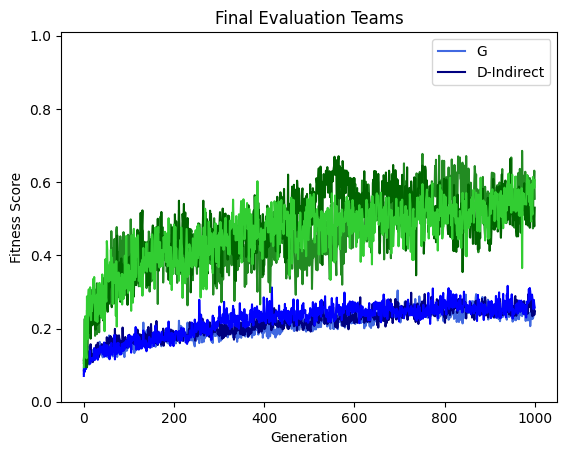

In [32]:
import matplotlib.pyplot as plt

plt.plot(team_fitness_0, color="royalblue", linestyle="-")
plt.plot(team_fitness_1, color="navy", linestyle="-")
plt.plot(team_fitness_2, color="blue", linestyle="-")

plt.plot(team_fitness_3, color="forestgreen", linestyle="-")
plt.plot(team_fitness_4, color="darkgreen", linestyle="-")
plt.plot(team_fitness_5, color="limegreen", linestyle="-")

plt.xlabel("Generation")
plt.ylabel("Fitness Score")
plt.ylim([0.0,1.01])
plt.title("Final Evaluation Teams")
legend = ["G", "D-Indirect"]
plt.legend(legend)
plt.show()


In [ ]:
"""
Colors for matplotlib

plt.plot(team_fitness_0, color="royalblue", linestyle="-")
plt.plot(team_fitness_1, color="navy", linestyle="-")
plt.plot(team_fitness_2, color="blue", linestyle="-")

plt.plot(team_fitness_3, color="darkorange", linestyle="-")
plt.plot(team_fitness_4, color="navajowhite", linestyle="-")
plt.plot(team_fitness_5, color="orange", linestyle="-")

plt.plot(team_fitness_6, color="forestgreen", linestyle="-")
plt.plot(team_fitness_7, color="limegreen", linestyle="-")
plt.plot(team_fitness_8, color="darkgreen", linestyle="-")

"""

Saving plot as  figures/trial_5 | stat_runs 3 | Evaluation Team | G Df | std err | experiment_9.png
Saving plot as  figures/trial_5 | stat_runs 3 | Evaluation Team | G Df | std err | experiment_9.svg


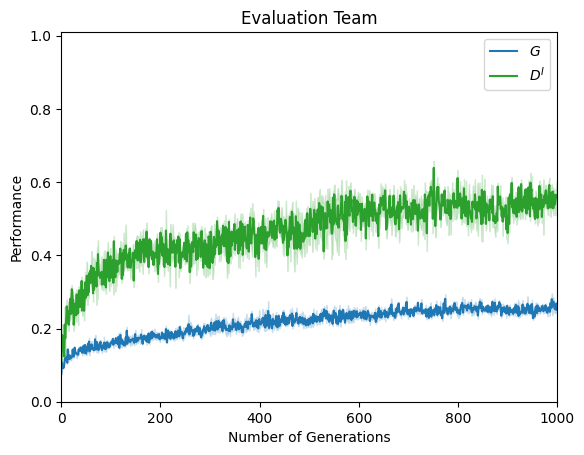

In [34]:
from lib.plot_helpers import plotBatchPerformance, PerformanceMetric

"""Plot the evaluation team performance metric"""

plot_min_max_range = False

plotBatchPerformance(
    trial_datas_G=[trial_data_0, trial_data_1, trial_data_2],
    trial_datas_D=None,
    trial_datas_Dfollow=[trial_data_3, trial_data_4, trial_data_5],
    plot_min_max_range=plot_min_max_range,
    start_trial_num=5,
    num_stat_runs=3,
    computername="experiment_9",
    performance_metric=PerformanceMetric.EvaluationTeam
)


In [37]:
trial_data_3_population = loadTrialData(trialname="trial_3", computername="experiment_9", load_populations=True, load_evaluation_teams=True, load_training_teams=True)
trial_data_4_population = loadTrialData(trialname="trial_4", computername="experiment_9", load_populations=True, load_evaluation_teams=True, load_training_teams=True)
trial_data_5_population = loadTrialData(trialname="trial_5", computername="experiment_9", load_populations=True, load_evaluation_teams=True, load_training_teams=True)

100%|██████████| 1001/1001 [10:54<00:00,  1.53it/s]


In [41]:
# Plot the joint trajectories from a particular generation

trial_data = trial_data_3_population

PLOT_TRAJECTORIES_TEAM_ID = "Eval"
PLOT_TRAJECTORIES_GENERATION = 1000

if PLOT_TRAJECTORIES_GENERATION is None:
    PLOT_TRAJECTORIES_GENERATION = config["num_generations"]

import matplotlib.patches as mpatches
from typing import List, Optional
from matplotlib.axes import Axes
from matplotlib.lines import Line2D

%matplotlib qt

def scaleRGB(rgb_values: List[int]):
    scaled_values = []
    for value in rgb_values:
        scaled_values.append(float(value)/255.)
    return tuple(scaled_values)


def plotJointTrajectorySubplot(ax: Axes, generation: Optional[int], team_id: int | str, individual_plot: bool = True):
    if generation is None:
        generation = config["num_generations"]
    if team_id == "Eval":
        # Get the joint trajectory of the evaluation team
        # joint_trajectory = np.array('final_evaluation_teams'[generation].joint_trajectory).tolist()
        joint_trajectory = np.array(trial_data[generation]["evaluation_team"]["joint_trajectory"]).tolist()
    else:
        # First get the joint trajectory for this particular generation
        # Each element is a snapshot of all agent positions at a particular point in time
        # teams_in_evaluations is a global variable thanks to how python does things
        # joint_trajectory = np.array(teams_in_evaluations[generation][team_id].joint_trajectory).tolist()
        joint_trajectory = np.array(trial_data[generation]["training_teams"]["team_"+str(team_id)]["joint_trajectory"]).tolist()
    
    # I need the joint trajectory as a list of trajectories where each trajectory is a list of (x,y) tuples for a particular agent
    num_trajectories = len(joint_trajectory[0])
    list_of_trajectories = [[] for _ in range(num_trajectories)]
    for positions in joint_trajectory:
        for position, trajectory in zip(positions, list_of_trajectories):
            trajectory.append(tuple(position))

    # Now I need to set up variables for the plot

    # Get map dimensions for figuring the x and y limits of the graph
    map_dimensions = config["CCEA"]["config"]["BoidsEnv"]["config"]["map_dimensions"]
    map_dim_x = map_dimensions["x"]
    map_dim_y = map_dimensions["y"]

    # Use map dimensions to figure out correctly proportioned graph size
    # Keep x dimension the same and adjust the y dimension accordingly
    # fig_x = 5.
    # fig_y = fig_x * float(map_dim_y)/float(map_dim_x)

    # Get the number of leaders and followers
    num_leaders = config["CCEA"]["config"]["BoidsEnv"]["config"]["StateBounds"]["num_leaders"]
    num_followers = config["CCEA"]["config"]["BoidsEnv"]["config"]["StateBounds"]["num_followers"]

    # Set up the leader colors for coloring the trajectories
    leader_colors_rgb_raw = config["CCEA"]["config"]["BoidsEnv"]["config"]["Renderer"]["leader_colors"]
    leader_colors_scaled = [scaleRGB(color) for color in leader_colors_rgb_raw]
    leader_colors = []
    for leader_ind in range(num_leaders):
        leader_colors.append(leader_colors_scaled[leader_ind%len(leader_colors_scaled)])

    # Set up follower color
    follower_color = scaleRGB([0, 120, 250])
    # Set up colors of agents for all trajectories
    agent_colors = leader_colors + [follower_color]*num_followers

    # I reverse it so that the leader trajectories are plotted on top
    for trajectory, agent_color in reversed(list(zip(list_of_trajectories, agent_colors))):
        xs, ys = zip(*trajectory)
        ax.plot(xs, ys, color=agent_color, marker='.')

    # Set up poi colors
    # For now just use the observed color because I don't yet save 
    # if a poi has been observed or not, so to determine that we would have to do a rollout or 
    # call some code to compute that
    poi_observed_color = scaleRGB([0, 150, 0])
    # poi_unobserved_color = scaleRGB([255, 0, 0])

    # Get the POI positions for the configuration
    # Later on this should plot the poi observation radius also
    poi_positions = config["CCEA"]["config"]["BoidsEnv"]["config"]["POISpawner"]["positions"]
    num_pois = len(poi_positions)
    poi_colors = [poi_observed_color]*num_pois
    for poi_position, poi_color in zip(poi_positions, poi_colors):
        ax.plot(poi_position[0], poi_position[1], marker=".", color=poi_color)

    # Add axes labels and a title
    if individual_plot:
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_title('Joint Trajectory')

    # Limits according to map dimensions from config
    ax.set_xlim([0, map_dim_x])
    ax.set_ylim([0, map_dim_y])

    # Custom legend
    leader_handles = [
        Line2D([0], [0], color=leader_color, lw=1) for leader_color in leader_colors
    ]
    leader_labels = ["Leader "+str(i+1) for i in range(num_leaders)]

    follower_handle = Line2D([0], [0], color=follower_color, lw=1)
    follower_label = "Follower"

    poi_handle = Line2D([0], [0], color=poi_observed_color, lw=0, marker=".")
    poi_label = "POI"

    handles = leader_handles + [follower_handle] + [poi_handle]
    labels = leader_labels + [follower_label] + [poi_label]

    if individual_plot:
        ax.legend(handles, labels)

    # Add a grid and make it look pretty
    ax.grid()
    ax.tick_params(
        axis='both',
        which='both',
        top = False,
        bottom = False,
        left = False,
        right = False
    )
    # Give plot a gray background like ggplot.
    ax.set_facecolor('#EBEBEB')
    # Remove border around plot.
    [ax.spines[side].set_visible(False) for side in ax.spines]
    # Style the grid.
    ax.grid(which='major', color='white', linewidth=1.2)
    ax.grid(which='minor', color='white', linewidth=0.6)

    # Set up the ticks for the grid
    xticks = np.linspace(0, int(map_dim_x - (map_dim_x%10)), int(map_dim_x/10.)+1)
    yticks = np.linspace(0, int(map_dim_y - (map_dim_y%10)), int(map_dim_y/10.)+1)

    # Remove labels for individual ticks if option is specified
    if not individual_plot:
        ax.set_xticks(ticks=xticks, labels=[])
        ax.set_yticks(ticks=yticks, labels=[])

    # Show the minor ticks and grid.
    # ax.minorticks_on()
    # Now hide the minor ticks (but leave the gridlines).
    # ax.tick_params(which='minor', bottom=False, left=False)

    ax.set_aspect('equal')

if PLOT_TRAJECTORIES_TEAM_ID is None:
# Figure out the grid size to place all of the plots in
    # Reference: https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html
    num_teams = config["CCEA"]["sub_population_size"]+1
    grid_len = int(np.ceil(np.sqrt(num_teams)))
    fig, axs = plt.subplots(nrows=grid_len, ncols=grid_len, figsize=(15,15), tight_layout=True)
    for team_id, ax in zip(np.arange(num_teams), axs.flat):
        # Add in case for plotting joint trajectory of the evaluation team
        if team_id == num_teams-1:
            team_id = "Eval"
            # Get the fitness of the evaluation team
            team_fitness = trial_data[PLOT_TRAJECTORIES_GENERATION]["evaluation_team"]["team_fitness"][0]
        else:
            # Get the fitness of the training team
            team_fitness = trial_data[PLOT_TRAJECTORIES_GENERATION]["training_teams"]["team_"+str(team_id)]["team_fitness"][0]

        plotJointTrajectorySubplot(ax=ax, generation=PLOT_TRAJECTORIES_GENERATION, team_id=team_id, individual_plot=False)
        # Objects for a custom legend that just lets me display important metadata
        class AnyObject:
            pass
        class AnyObjectHandler:
            def legend_artist(self, legend, orig_handle, fontsize, handlebox):
                x0, y0 = handlebox.xdescent, handlebox.ydescent
                width, height = handlebox.width, handlebox.height
                patch = mpatches.Rectangle([x0, y0], 0, 0, facecolor='red',
                                        edgecolor='black', hatch='xx', lw=0,
                                        transform=handlebox.get_transform())
                handlebox.add_artist(patch)
                return patch
            
        # # Extract the fitness for this particular team
        # team_fitness = teams_in_evaluations[PLOT_TRAJECTORIES_GENERATION][team_id].fitness
        # team_fitness = trial_data[]

        # Format that fitness into a nice str
        fitness_str = f"{team_fitness:.3f}"

        # Custom legend that acts as a label for what team this plot is from
        # fake_handle = Line2D([0], [0], color='white', lw=0)
        fake_handle = AnyObject()
        fake_label = str(team_id) + " | " + fitness_str
        ax.legend([fake_handle], [fake_label], loc='upper right', handler_map={AnyObject: AnyObjectHandler()}, handlelength=-1)
        fig.suptitle("Generation "+str(PLOT_TRAJECTORIES_GENERATION))
    if team_id == "Eval":
        team_id = num_teams+1
    for ax in axs.flat[team_id+1:]:
        ax.tick_params(
            axis='both',
            which='both',
            top = False,
            bottom = False,
            left = False,
            right = False
        )
        ax.set_xticks(ticks=[], labels=[])
        ax.set_yticks(ticks=[], labels=[])
        # Remove border around plot.
        [ax.spines[side].set_visible(False) for side in ax.spines]

    fig.subplots_adjust(wspace=0, hspace=0)

    plt.show()
    pass
# If team id is specified, then just plot that one joint trajectory
else:
    # Get map dimensions for figuring the x and y limits of the graph
    map_dimensions = config["CCEA"]["config"]["BoidsEnv"]["config"]["map_dimensions"]
    map_dim_x = map_dimensions["x"]
    map_dim_y = map_dimensions["y"]

    # Use map dimensions to figure out correctly proportioned graph size
    # Keep x dimension the same and adjust the y dimension accordingly
    fig_x = 5.
    fig_y = fig_x * float(map_dim_y)/float(map_dim_x)

    # Set up the plot
    fig = plt.figure(figsize=(fig_x, fig_y))
    ax = fig.add_subplot(1,1,1)
    plotJointTrajectorySubplot(ax=ax, generation=PLOT_TRAJECTORIES_GENERATION, team_id=PLOT_TRAJECTORIES_TEAM_ID)
    plt.show()

IndexError: list index out of range